In [1]:
import matplotlib.pyplot as plt
from odmactor.scheduler import PulseScheduler
import scipy.constants as C
import unittest
import numpy as np
from odmactor.utils.plotting import plot_freq_contrast
import time


In [6]:
freq_start = 2.85 * C.giga
freq_end = 2.89 * C.giga
freq_step = 2 * C.mega

##########################
# e.g.
# N = 100 000
# single ASG period: 5 us
# MW period at each freq: 5*N ~ 0.5s
# total time: 5 * N * 10(11) ~ 5 s
##########################
N = int(1e6/2)
channel_dict = {
    'laser': 1,
    'mw': 2,
    'apd': 3,
    'tagger': 5
}
tagger_input = {'apd': 1, 'asg': 2}

t_init = 5e3
t_mw = 1e3
inter_init_mw = 3e3

p = 15


对比度测量：



In [7]:
scheduler = PulseScheduler()
scheduler.channel = channel_dict
scheduler.tagger_input = tagger_input
scheduler.configure_mw_paras(power=p)
scheduler.configure_odmr_seq(t_init, t_mw, t_read_sig=400, inter_init_mw=inter_init_mw, N=N)

scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_tagger_counting(reader='cbm')

scheduler.run_scanning('on')

scheduler.close()

--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}
Begin to run Pulse ODMR Scheduler. Frequency: 2.850 - 2.890 GHz.
t: 9600.00 ns, N: 500000, T: 4.80 s, n_freqs: 21
Estimated total running time: 100.80 s
MW on/off status: True
Pulse _acquire_data_with_ref
scanning freq 2.8500 GHz
scanning freq 2.8520 GHz
scanning freq 2.8540 GHz
scanning freq 2.8560 GHz
scanning freq 2.8580 GHz
scanning freq 2.8600 GHz
scanning freq 2.8620 GHz
scanning freq 2.8640 GHz
scanning freq 2.8660 GHz
scanning freq 2.8680 GHz
scanning freq 2.8700 GHz
scanning freq 2.8720 GHz
scanning freq 2.8740 GHz
scanning freq 2.8760 GHz
scanning freq 2.8780 GHz
scanning freq 2.8800 GHz
scanning freq 2.8820 GHz
scanning freq 2.8840 GHz
scanning freq 2.8860 GHz
scanning freq 2.8880 GHz
scanning freq 2.8900 GHz
finished data acquisition
result has been saved into ../output/Pulse ODMR Scheduler-result-2022-02-02-1643848072.json
Scheduling process has stopped
All instrument resources has been released

In [8]:
res_on_off = scheduler.result
res = scheduler.res

# plt.style.use('seaborn')

In [15]:
res_detail = scheduler.result_detail['origin_data']
res_detail_ref = scheduler.result_detail['origin_data_ref']

In [21]:
sum(res_detail[20]) / sum(res_detail_ref[20])


0.9951553434184863

画计数图（MW on v.s. MW off)


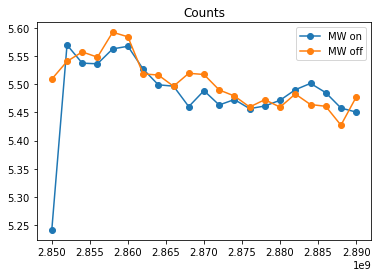

In [10]:
plt.plot(res_on_off[0], res_on_off[1],'o-',label='MW on')
plt.plot(res_on_off[0], res_on_off[2], 'o-', label='MW off')
plt.legend()
plt.title('Counts')
plt.show()



画对比度图 $ S / R$

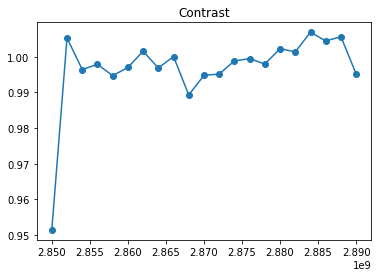

In [11]:
plt.plot(res_on_off[0], res, 'o-')
plt.title('Contrast')
plt.show()

保存数据：

In [ ]:
np.savetxt('cw-counting--10dbm.txt', np.array(res_on_off))
np.savetxt('cw-contrast--10dbm.txt',np.vstack([res_on_off[0], res]).T)

---

In [30]:
# plt.style.use('seaborn-white')

# scheduler.sequences_figure.savefig('pulse-seq-test.png', dpi=400)


scheduler.run_scanning('on')

res_on = scheduler.result

scheduler.run_scanning('off')
# 自动重启各个仪器
scheduler.close()
res_off = scheduler.result

contrasts = [abs(c_off - c_on) / c_on for c_on, c_off in zip(res_on[1], res_off[1])]

Begin to run Pulse ODMR Scheduler. Frequency: 2.850 - 2.890 GHz.
t: 9600.00 ns, N: 500000, T: 4.80 s, n_freqs: 41
Estimated total running time: 196.80 s
MW on/off status: True
scanning freq 2.850 GHz
scanning freq 2.851 GHz
scanning freq 2.852 GHz
scanning freq 2.853 GHz
scanning freq 2.854 GHz
scanning freq 2.855 GHz
scanning freq 2.856 GHz
scanning freq 2.857 GHz
scanning freq 2.858 GHz
scanning freq 2.859 GHz
scanning freq 2.860 GHz
scanning freq 2.861 GHz
scanning freq 2.862 GHz
scanning freq 2.863 GHz
scanning freq 2.864 GHz
scanning freq 2.865 GHz
scanning freq 2.866 GHz
scanning freq 2.867 GHz
scanning freq 2.868 GHz
scanning freq 2.869 GHz
scanning freq 2.870 GHz
scanning freq 2.871 GHz
scanning freq 2.872 GHz
scanning freq 2.873 GHz
scanning freq 2.874 GHz
scanning freq 2.875 GHz
scanning freq 2.876 GHz
scanning freq 2.877 GHz
scanning freq 2.878 GHz
scanning freq 2.879 GHz
scanning freq 2.880 GHz
scanning freq 2.881 GHz
scanning freq 2.882 GHz
scanning freq 2.883 GHz
scanning

In [ ]:
# scheduler.run_scanning('on')
# scheduler.close()
# res = scheduler.result


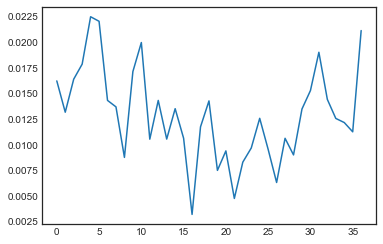

In [37]:
plt.plot(contrasts[4:])



In [14]:
res_ori = scheduler.result_detail['origin_data']

In [20]:
data = res_ori[20]
sig = data[::2]
ref = data[1::2]


In [24]:
(sum(sig)/ sum(ref))



0.07030451155946829

In [ ]:
# run之后自动stop各个仪器，
# scheduler.close()

res_on = scheduler.result

scheduler.run_scanning('off')
# 自动重启各个仪器
scheduler.close()
res_off = scheduler.result

contrasts = [abs(c_off - c_on) / c_on for c_on, c_off in zip(res_on[1], res_off[1])]

plt.plot(*res_on, label='MW on')
plt.plot(*res_off, label='MW off')
plt.title('Counts comparison')
plt.savefig('counts_on_off (Pulse)', dpi=400)

plot_freq_contrast(res_on[0], contrasts, fname='contrasts-single-pulse-repetition')




---

In [3]:
# transition_time = 0.0  # 平衡过渡时间


scheduler = PulseScheduler()
scheduler.channel = channel_dict
scheduler.tagger_input = tagger_input
scheduler.configure_mw_paras(power=p)
scheduler.configure_odmr_seq(t_init, t_mw, t_read_sig=400, t_read_ref=400, inter_init_mw=inter_init_mw, N=N)
scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
scheduler.configure_tagger_counting(reader='cbm')
scheduler.run()
# scheduler.save_result('pulse-result-1123')
scheduler.close()
# with open('seq.txt', 'w') as f:
#     f.write(scheduler.sequences_strings)
# scheduler.sequences_figure.savefig('pulse-seq.png', dpi=400)


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}
MW on/off status: True
True
scanning freq 2.850 GHz
scanning freq 2.851 GHz
scanning freq 2.852 GHz
scanning freq 2.853 GHz
scanning freq 2.854 GHz
scanning freq 2.855 GHz
scanning freq 2.856 GHz
scanning freq 2.857 GHz
scanning freq 2.858 GHz
scanning freq 2.859 GHz
scanning freq 2.860 GHz
scanning freq 2.861 GHz
scanning freq 2.862 GHz
scanning freq 2.863 GHz
scanning freq 2.864 GHz
scanning freq 2.865 GHz
scanning freq 2.866 GHz
scanning freq 2.867 GHz
scanning freq 2.868 GHz
scanning freq 2.869 GHz
scanning freq 2.870 GHz
scanning freq 2.871 GHz
scanning freq 2.872 GHz
scanning freq 2.873 GHz
scanning freq 2.874 GHz
scanning freq 2.875 GHz
scanning freq 2.876 GHz
scanning freq 2.877 GHz
scanning freq 2.878 GHz
scanning freq 2.879 GHz
scanning freq 2.880 GHz
scanning freq 2.881 GHz
scanning freq 2.882 GHz
scanning freq 2.883 GHz
scanning freq 2.884 GHz
scanning freq 2.885 GHz
scanning freq 2.886 GHz
scann

In [6]:
plot_freq_contrast(*scheduler.result, fname='contrasts-two-pulse')

TypeError: plot_freq_contrast() missing 2 required positional arguments: 'freqs' and 'contrast'

In [ ]:
def single_freq_testing(freq):
    scheduler = PulseScheduler()
    scheduler.channel = channel_dict
    scheduler.tagger_input = tagger_input
    scheduler.configure_mw_paras(power=10, freq=freq)
    scheduler.configure_odmr_seq(t_init, t_mw, t_read_sig=400, t_read_ref=400, inter_init_mw=inter_init_mw, N=N)
    scheduler.configure_tagger_counting(reader='cbm')
    scheduler.run(scan=False)
    scheduler.save_result('pulse-result-single-freq')
    scheduler.close()
    # with open('seq.txt', 'w') as f:
    #     f.write(scheduler.sequences_strings)

    # plot_freq_contrast(*scheduler.result, fname='contrasts-two-pulse')



In [ ]:
def wave_form():
    scheduler = PulseScheduler()
    scheduler.channel = channel_dict
    scheduler.tagger_input = tagger_input
    scheduler.configure_mw_paras(power=10)
    scheduler.configure_odmr_seq(t_init, t_mw, t_read_sig=400, t_read_ref=400, inter_init_mw=inter_init_mw, N=N)
    scheduler.set_mw_freqs(freq_start, freq_end, freq_step)
    scheduler.configure_tagger_counting()

    scheduler.sequences_figure.savefig('seq.png', dpi=400)
    scheduler.close()